## Ejercicio de Regresión 1 (Core)


### Objetivo

 Aplicar los conceptos de regresión lineal para resolver un problema práctico utilizando Python.

 ### Descripción del problema:
  Supongamos que trabajas en una empresa que desea predecir el precio de venta de casas en función de varias características.
  
  Tienes un conjunto de datos con información sobre las casas, incluyendo el tamaño de la casa (en pies cuadrados), el número de habitaciones, el número de baños y la antigüedad de la casa (en años).
  
  Tu tarea es construir un modelo de regresión lineal que pueda predecir el precio de venta de una casa dada.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Instrucciones:

1. Carga de datos: Descarga el archivo de datos house_prices.csv que contiene las siguientes columnas:
- SqFt: Tamaño de la casa en pies cuadrados.
- Bedrooms: Número de habitaciones.
- Bathrooms: Número de baños.
- price: Precio de venta de la casa.


In [12]:
# descargamos el dataset 
df = pd.read_csv('data/house-prices.csv', sep=',')
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East



2. Exploración de datos: Realiza un análisis exploratorio de los datos para entender su estructura y detectar posibles problemas como valores nulos o outliers.


In [13]:
#entendemos la estructura del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [14]:
df['Brick'].nunique()

2

In [15]:
# revisamos si es necesario cambiar dos data types object, Brick a booleano y Neighborhood a categoricos
df['Brick'] = df['Brick'].astype('bool')
df['Neighborhood'] = df['Neighborhood'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Home          128 non-null    int64   
 1   Price         128 non-null    int64   
 2   SqFt          128 non-null    int64   
 3   Bedrooms      128 non-null    int64   
 4   Bathrooms     128 non-null    int64   
 5   Offers        128 non-null    int64   
 6   Brick         128 non-null    bool    
 7   Neighborhood  128 non-null    category
dtypes: bool(1), category(1), int64(6)
memory usage: 6.5 KB


In [16]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


In [17]:
# revisamos los datos estadisticos
df.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000



3. Preparación de datos: Divide los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).


In [18]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['SqFt', 'Bedrooms', 'Bathrooms']]
y = df['Price']


In [19]:
# Dvidimos los datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4. Entrenamiento del modelo: Entrena un modelo de regresión lineal utilizando los datos de entrenamiento.


In [20]:
modelo = LinearRegression()

# Ajustar a los datos de entrenamiento
modelo.fit(X_train, y_train)

# Hacer predicciones utilizando el Pipeline
y_pred = modelo.predict(X_test)


5. Evaluación del modelo: Evalúa el modelo utilizando el conjunto de prueba. Calcula el error cuadrático medio (MSE) y el R-cuadrado (R²) del modelo.


In [21]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')

Error Cuadrático Medio: 320149938.2302681
R-cuadrado: 0.4568195777548879


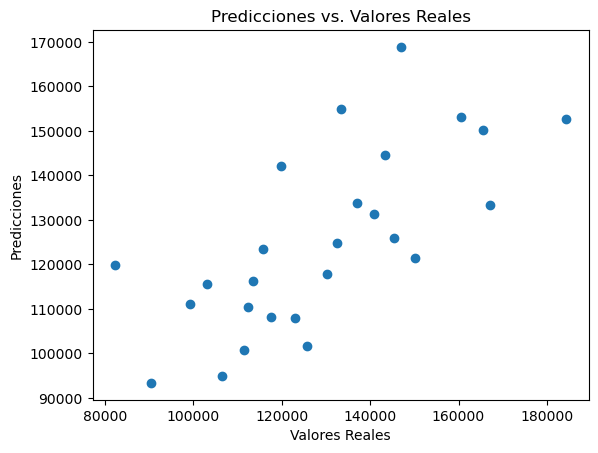

In [22]:
import matplotlib.pyplot as plt

# Gráfico de dispersión de las predicciones vs. valores reales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()


6. Predicción: Usa el modelo entrenado para predecir el precio de una casa con las siguientes características:
- Tamaño: 2000 pies cuadrados
- Habitaciones: 3
- Baños: 2

In [23]:
# Características de la casa a predecir
nueva_casa = [[2000, 3, 2]]

# Hacer la predicción
precio_predicho = modelo.predict(nueva_casa)

print(f'El precio predicho para la casa es: {precio_predicho[0]}')


El precio predicho para la casa es: 123536.99693218437


c:\Users\diego\miniconda3\envs\bootcamp_mitic_ds\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
